In [1]:
using Random; using Distributions;

In [2]:
trans = [200 300 500
         100 300 600
         400 100 500]

3×3 Array{Int64,2}:
 200  300  500
 100  300  600
 400  100  500

In [40]:
#For each of the nine probabilities we set the prior, α11,…,α33 equal to 1, 
# which is equivalent to a prior in which each transition is equally likely. We use the value 1 so that the prior has almost no
# influence on the posterior estimates for the transition matrix.
alpha = 1 

1

In [41]:
dirinput = trans .+ alpha

3×3 Array{Int64,2}:
 201  301  501
 101  301  601
 401  101  501

In [5]:
Random.seed!(1234); 


## samples from the Dirichlet distribution using each row from trans as the "alpha" vector
function rdirichlet_mat(trans)
    r, c = size(trans)
    ret = Matrix{Float64}(undef, r, c)
    for i = 1:r
        r = trans[1, :]        
        ret[i, :] = rand(Dirichlet(r))
    end
    return ret
end

## this function runs the above function n times and stores the result in an Array of Matrices
function rdirichlet_samples(n, trans)
    ret = Array{Matrix}(undef, n)
    for i = 1:n
        ret[i] = rdirichlet_mat(trans)
    end
    return ret
end

rdirichlet_samples (generic function with 1 method)

In [4]:
## get a 1000 sample matrices
@show typeof(rdirichlet_mat(trans))
a = rdirichlet_samples(1000, trans)
@show typeof(a)

UndefVarError: UndefVarError: rdirichlet_mat not defined

In [37]:
function naive_flatten(a)
    ret = Array{Float64}(undef, 0)
    @inbounds for i=1:length(a) 
        append!(ret, vec(a[i]))
    end
    return ret
end

function naive_flatten_two(a)
    ret = Array{Float64}(undef, 9000)
    for i = 1:length(a)       
        for j in 1:9
            push!(ret, a[i][j])
        end        
    end
    return ret
end

naive_flatten_two (generic function with 1 method)

In [47]:
#a = [rand(3, 3) for i = 1:1000];
@show a[1][1]
@time collect(flatten(a))
@time naive_flatten(a)
@time naive_flatten_two(a)

(a[1])[1] = 0.113347083689745
  0.003047 seconds (18.05 k allocations: 821.219 KiB)
  0.000075 seconds (2.02 k allocations: 222.797 KiB)
  0.000128 seconds (7 allocations: 140.859 KiB)


18000-element Array{Float64,1}:
 0.0                  
 6.9270146912931e-310 
 6.92701463865175e-310
 0.04171550322033478  
 0.14098447797053604  
 0.14295943263825306  
 0.45155129037103037  
 6.52176518e-315      
 0.113347083689745    
 0.8320946794567503   
 0.7803094872769618   
 0.2421725002730295   
 0.07686089208238722  
 ⋮                    
 0.03814665373710335  
 0.7177969720964645   
 0.13734176859978064  
 0.23536711368632113  
 0.4682284123424554   
 0.168210071440815    
 0.2335368443200414   
 0.02500853920250501  
 0.5922811840524227   
 0.9568229326705142   
 0.11584132169700778  
 0.4601521764373542   

In [48]:
## convert the matrices into "long format"
using BenchmarkTools; using Base.Iterators; 
@btime aa = naive_flatten($a)

@btime aa = naive_flatten_two($a)
## built in function
@btime aa = collect(flatten($a))


  61.224 μs (2012 allocations: 222.64 KiB)
  82.869 μs (3 allocations: 140.70 KiB)
  204.360 μs (18015 allocations: 819.22 KiB)


9000-element Array{Float64,1}:
 0.113347083689745   
 0.8320946794567503  
 0.7803094872769618  
 0.2421725002730295  
 0.07686089208238722 
 0.7102647505734645  
 0.47580648927915914 
 0.7543874543946125  
 0.6338767050647016  
 0.009736251407810315
 0.04508648963343642 
 0.7499656712477352  
 0.3232553515206027  
 ⋮                   
 0.03814665373710335 
 0.7177969720964645  
 0.13734176859978064 
 0.23536711368632113 
 0.4682284123424554  
 0.168210071440815   
 0.2335368443200414  
 0.02500853920250501 
 0.5922811840524227  
 0.9568229326705142  
 0.11584132169700778 
 0.4601521764373542  

In [34]:
using DataFrames; using CategoricalArrays
df = DataFrame()
df.probs = aa
df.state = repeat([1, 2, 3], 3000)
df.cat = repeat([1, 1, 1, 2, 2, 2, 3, 3, 3], 1000)
categorical!(df, :cat)
@show levels(df[:cat])
df

levels(df[:cat]) = [1, 2, 3]


9000×3 DataFrame
│ Row  │ probs    │ state │ cat          │
│      │ Any      │ Int64 │ Categorical… │
├──────┼──────────┼───────┼──────────────┤
│ 1    │ 0.190985 │ 1     │ 1            │
│ 2    │ 0.192349 │ 2     │ 1            │
│ 3    │ 0.197663 │ 3     │ 1            │
│ 4    │ 0.299889 │ 1     │ 2            │
│ 5    │ 0.296666 │ 2     │ 2            │
│ 6    │ 0.311711 │ 3     │ 2            │
│ 7    │ 0.509126 │ 1     │ 3            │
│ 8    │ 0.510985 │ 2     │ 3            │
│ 9    │ 0.490625 │ 3     │ 3            │
│ 10   │ 0.184552 │ 1     │ 1            │
⋮
│ 8990 │ 0.505367 │ 2     │ 3            │
│ 8991 │ 0.493358 │ 3     │ 3            │
│ 8992 │ 0.200079 │ 1     │ 1            │
│ 8993 │ 0.206927 │ 2     │ 1            │
│ 8994 │ 0.1952   │ 3     │ 1            │
│ 8995 │ 0.324431 │ 1     │ 2            │
│ 8996 │ 0.292998 │ 2     │ 2            │
│ 8997 │ 0.315332 │ 3     │ 2            │
│ 8998 │ 0.47549  │ 1     │ 3            │
│ 8999 │ 0.500075 │ 2     │ 3            │
│ 9000 │ 0.489468 │ 3     │ 3            │

In [35]:
## get data for initial state = 1

using Query
stdata =@from i in df begin
        @where i.state==1  
        @select i
        @collect DataFrame
end
@show nrow(stdata)
stdata;

nrow(stdata) = 3000


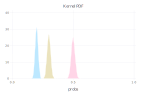

In [30]:
## plot using Gadfly which has a density() function
using Gadfly; p2 = Gadfly.plot(df, x=:probs, color=:cat,
    Stat.density(), Geom.polygon(fill=true, preserve_order=true),
    Coord.cartesian(xmin=0, xmax=1),
    Guide.colorkey(title="", pos=[2.5,0.6]), Guide.title("Kernel PDF")
)

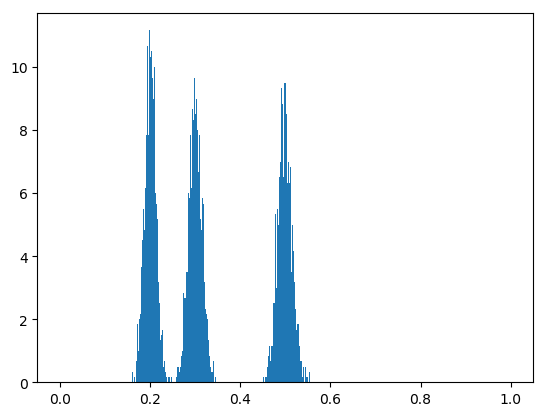

In [39]:
## PyPlot verison.. 
## don't know how to use the density=true flag to make it smooth. 
## also need to color based on the "cat"  variable
using PyPlot
plt[:hist](stdata[:probs], bins = 500, range=(0, 1), density=true);

In [2]:
x = "World"

"World"